# Breast cancer detection author Akshay Kapoor
dataset source: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


We have 30 different attributes from images extracted, Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. <br>
We predict the Stage of Breast Cancer B (Bengin) or M (malignant).

**Attribute Information:**
<br>
1) ID number <br>
2) Diagnosis (M = malignant, B = benign) <br>
3-32) <br>

Ten real-valued features are computed for each cell nucleus: <br>

a) radius (mean of distances from center to points on the perimeter) <br>
b) texture (standard deviation of gray-scale values) <br>
c) perimeter <br>
d) area <br>
e) smoothness (local variation in radius lengths) <br>
f) compactness (perimeter^2 / area - 1.0) <br>
g) concavity (severity of concave portions of the contour) <br>
h) concave points (number of concave portions of the contour) <br>
i) symmetry <br>
j) fractal dimension ("coastline approximation" - 1) <br>

In [3]:
#Importing the libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

#scikit learn libraries
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Let us learn more about the data 

In [4]:
df = pd.read_csv("AkshayData.csv")

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
#We can see Unnamed:32 has all null values hence we cannot use this column for our analysis and id will also be of no use for analysis
df.drop('Unnamed: 32', axis  = 1, inplace=True)
df.drop('id', axis = 1, inplace= True)


In [8]:
#Let us convert 'Malign' and 'Benign' to 1 and 0 respectively so it will be easier for analysis

df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [9]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Performing Exploratory Data Analysis


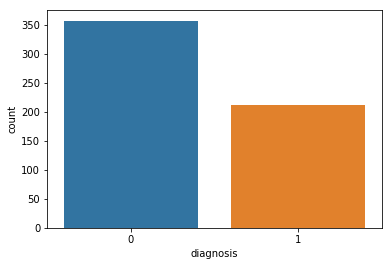

In [10]:
sns.countplot(df['diagnosis'])

We can see there are almost double number patients with benign cancer

In [11]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
#The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image,resulting in 30 features.
#For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
#more info at https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

first = list(df.columns[1:10])
second = list(df.columns[11:21])
third =  list(df.columns[21:30])


In [13]:
#Let us find the correlation between different attributes
corr1 = df[first].corr()

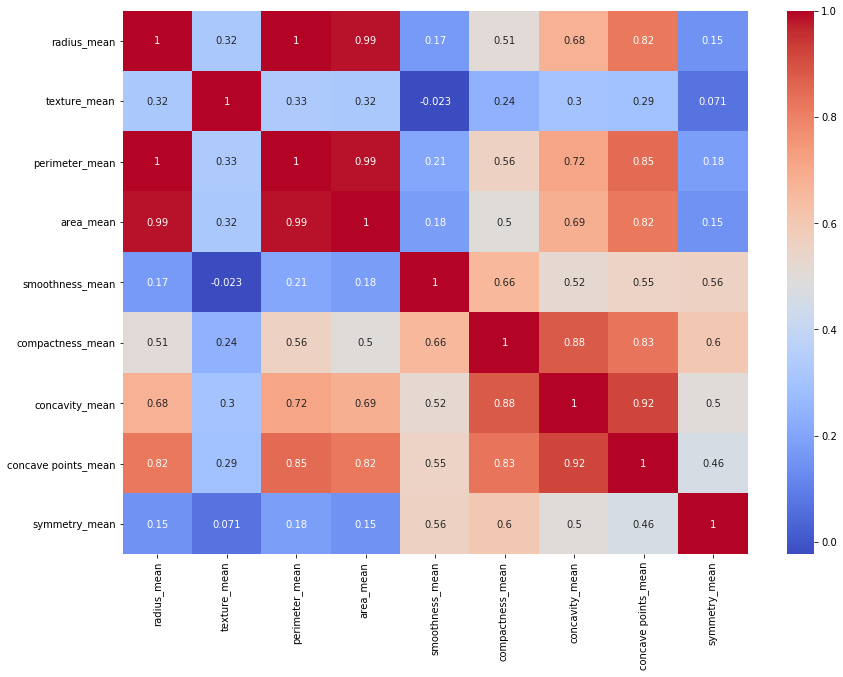

In [14]:
#Let us visualize with a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr1, cmap='coolwarm', xticklabels = first,  yticklabels = first, annot=True)

**We can see that radius, perimeter and area are highly correlated as seen from the heatmap.** <br>
**Also compactness_mean, concavepoint_mean and concavity_mean are highly correlated**


In [15]:
#Let us perform analysis on the mean features

melign = df[df['diagnosis'] == 1][first]
bening = df[df['diagnosis'] == 0][first]


In [16]:
melign.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

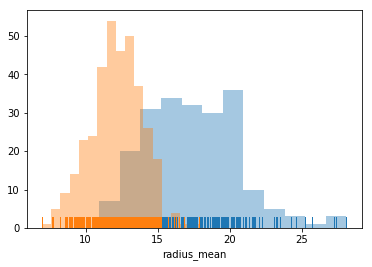

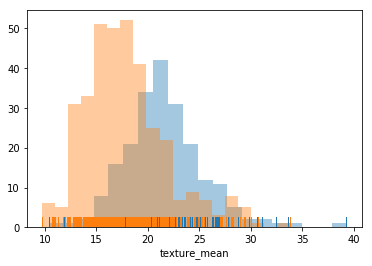

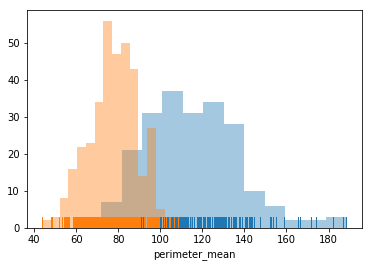

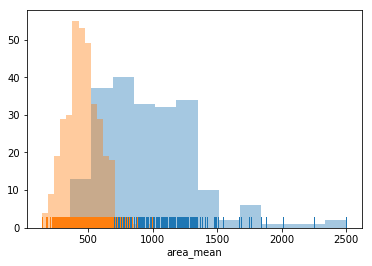

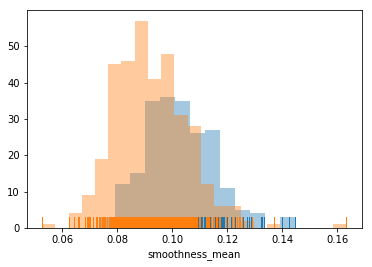

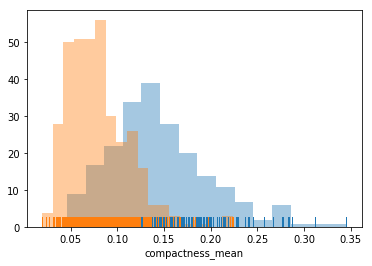

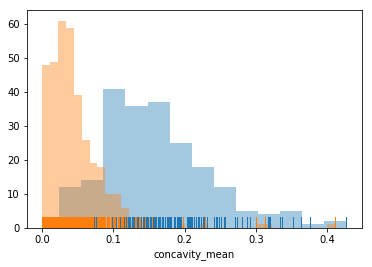

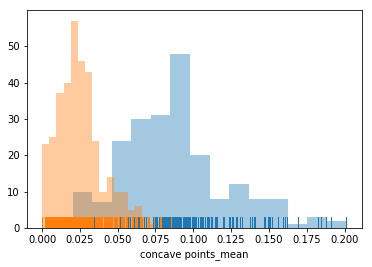

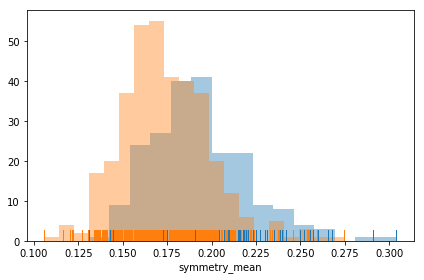

In [17]:
for columns in melign.columns:
    plt.figure()
    sns.distplot(melign[columns], kde=False, rug= True)
    sns.distplot(bening[columns], kde=False, rug= True)
    sns.distplot
plt.tight_layout()


We can see that the mean values of perimeter, area, concavity, compactness, radius and concave points can be used for classification as these parameters show a correlation. <br>
While parameters such as smoothness, symmetry, fractual dimension and texture don't show much seperation and is of not much use for classification.


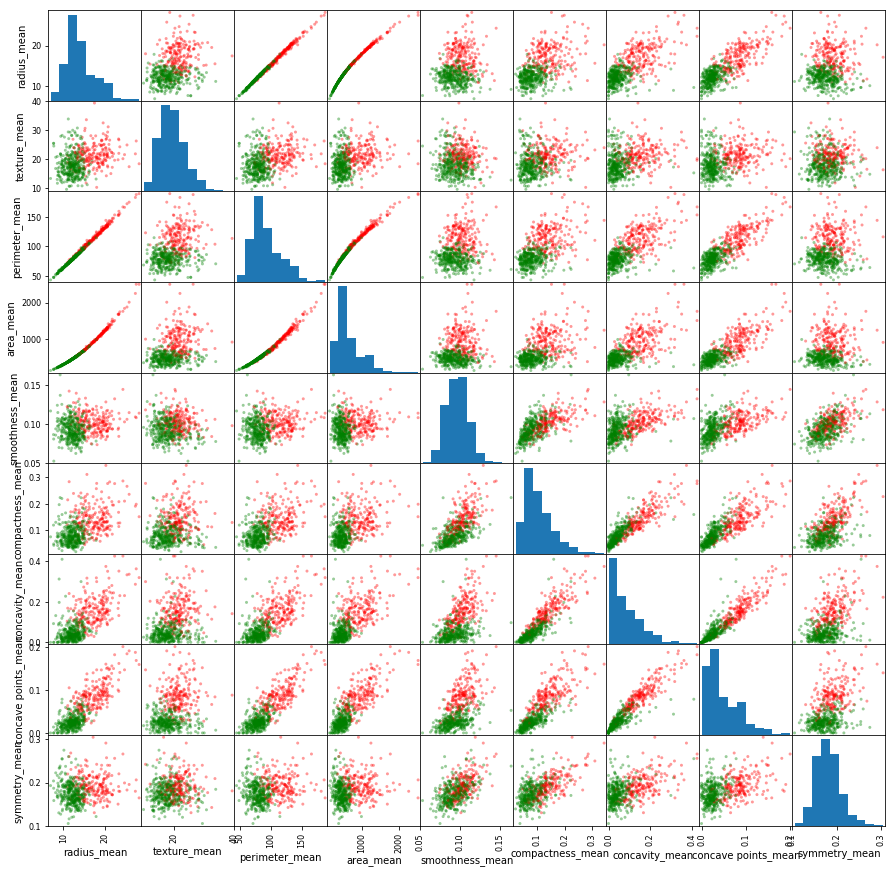

In [18]:
color_function = {0: "green", 1: "red"}
colors = df["diagnosis"].map(lambda x: color_function.get(x))

pd.plotting.scatter_matrix(df[first], c=colors, alpha = 0.4, figsize = (15, 15));


**Using a scatter matrix we can see a well seperation of malign and benign cancer with green points indication benign cancer cells and red points indicating malign cancer cells.**


## Machine learning


In [19]:
#We divide the data into Training and test set 
train, test = train_test_split(df, test_size = 0.25)

In [20]:
# I have created a function to perform k folds cross validation which helps in obtaining a better insight to test the accuracy of the model
# More info at https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0],n_folds= 5)
  error = []
  for train, test in kf:
    # Filter the training data
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  model.fit(data[predictors],data[outcome]) 

In [21]:
#Using Logistic regression on the top five features
#more info at https://en.wikipedia.org/wiki/Logistic_regression

predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 89.437%
Cross-Validation Score : 89.535%
Cross-Validation Score : 90.650%
Cross-Validation Score : 87.492%
Cross-Validation Score : 88.560%
Cross-Validation Score : 88.966%


In [22]:
#Let us check the accuracy on test data
classification_model(model, test,predictor_var,outcome_var)

Accuracy : 89.510%
Cross-Validation Score : 86.207%
Cross-Validation Score : 84.483%
Cross-Validation Score : 87.356%
Cross-Validation Score : 88.732%
Cross-Validation Score : 89.557%


In [23]:
#Let us try to classify using a decision tree classifier 
predictor_var = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concave points_mean']
model = DecisionTreeClassifier()
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 90.698%
Cross-Validation Score : 90.055%
Cross-Validation Score : 89.056%
Cross-Validation Score : 88.851%
Cross-Validation Score : 87.787%


We are getting 100% accuracy! Is it overfitting let us try it on test data


In [24]:
classification_model(model, test,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 89.655%
Cross-Validation Score : 93.103%
Cross-Validation Score : 90.805%
Cross-Validation Score : 89.532%
Cross-Validation Score : 89.483%


Let us try using random forest

In [25]:
predictor_var = first
model = RandomForestClassifier()
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 98.826%
Cross-Validation Score : 94.186%
Cross-Validation Score : 94.740%
Cross-Validation Score : 93.356%
Cross-Validation Score : 92.958%
Cross-Validation Score : 93.425%


In [26]:
#Let us find the most important features used for classification model

featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

concave points_mean    0.277226
perimeter_mean         0.274166
area_mean              0.114236
concavity_mean         0.101425
radius_mean            0.077072
compactness_mean       0.060727
texture_mean           0.045423
smoothness_mean        0.029571
symmetry_mean          0.020154
dtype: float64


In [27]:
predictor_var = ['concave points_mean','area_mean','radius_mean','perimeter_mean','concavity_mean']
model = RandomForestClassifier()
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 99.531%
Cross-Validation Score : 90.698%
Cross-Validation Score : 92.408%
Cross-Validation Score : 91.017%
Cross-Validation Score : 91.498%
Cross-Validation Score : 91.316%


In [28]:
# I think we get a better prediction with all the features now let us try it on test data!
predictor_var = first
model = RandomForestClassifier()
classification_model(model, test,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 93.103%
Cross-Validation Score : 93.103%
Cross-Validation Score : 89.655%
Cross-Validation Score : 90.456%
Cross-Validation Score : 91.650%


## Conclusion

Hence we can see detailed exploratory data analysis of breast cancer data and implementation of classification algorithms to train a model in detecting whether the cancer is benign or malign.
